<a href="https://colab.research.google.com/github/danieldrako/Estadistica-Descriptiva-Matemaicas-Data-Science/blob/main/01Medidas_de_tendencia_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de tendencia central

### Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [ ]:
import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/Estadistica-Descriptiva-Matemaicas-Data-Science/car.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


inspeccionemos el atributo de price_usd **(variable numérica continua)** de los autos listados en el dataset:

Promedio


In [ ]:
df['price_usd'].mean()

6639.971021255613

Mediana

In [ ]:
df['price_usd'].median()

4800.0

Diagrama de frecuencias 

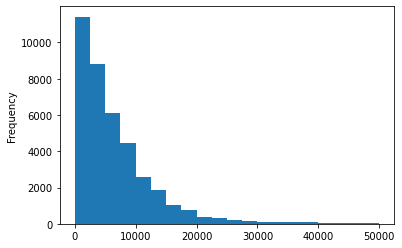

In [ ]:
df['price_usd'].plot.hist(bins=20)

resulta más interesante analizar los precios por marcas:

- pro tip: usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html

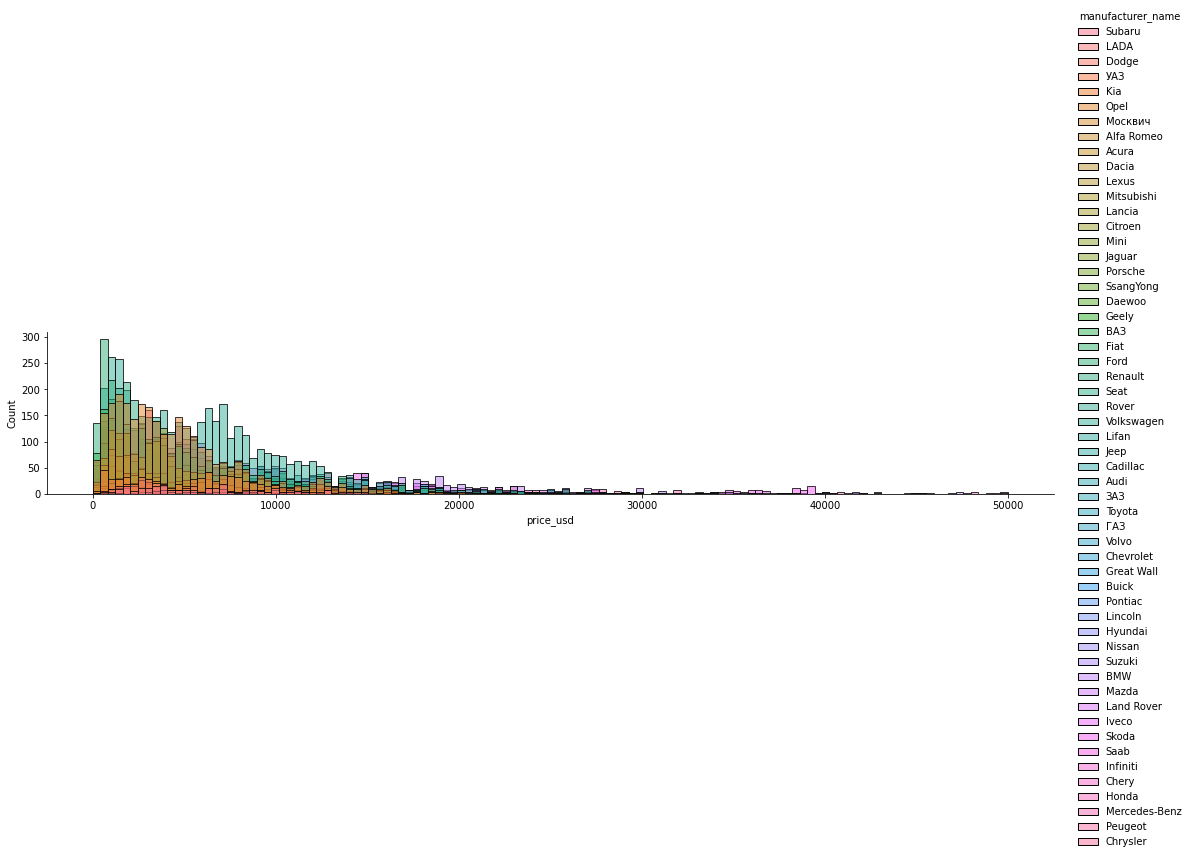

In [ ]:
import seaborn as sns
sns.displot(df, x = 'price_usd', hue = 'manufacturer_name',  height = 3, aspect = 5)


Debemos mejorar la visualizacion 
Se analizará por el tipo de motor

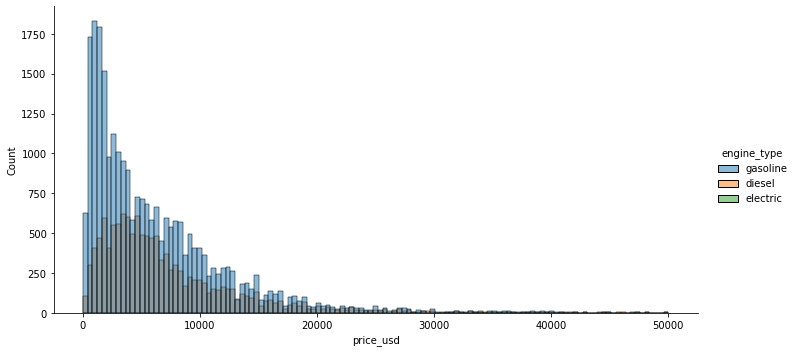

In [ ]:
sns.displot(df, x="price_usd", hue="engine_type",  height = 5, aspect = 2)

el histograma anterior es muy dificil de analizar, ¿donde están los autos eléctricos?

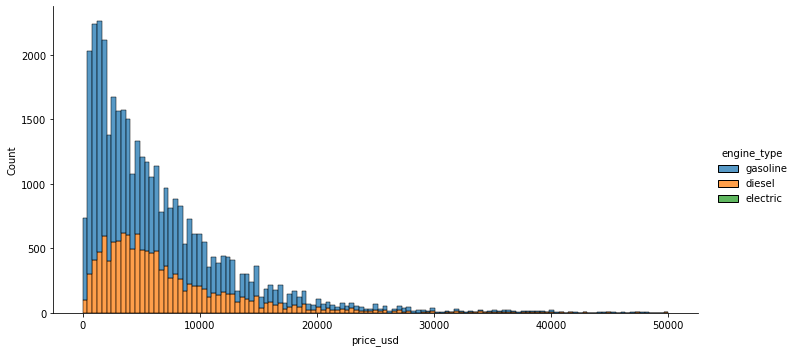

In [ ]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack',  height = 5, aspect = 2)

Agruparemos por conteo de datos agrupando el tipo de motor 

In [ ]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


 Inspeccionemos precios de una marca y modelo particular !

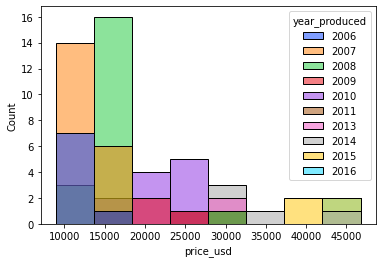

In [ ]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced', palette="bright")


##Como dato curioso e interesante:
No solo existen esas 3 medidas de tendencias central, hay otras más poco conocidas, pero las abordaremos ahora mismo:


- **Media ponderada:** es una medida de tendencia central, que es apropiada cuando en un conjunto de datos cada uno de ellos tiene una importancia relativa (o peso) respecto de los demás datos. Se obtiene multiplicando cada uno de los datos por su ponderación (peso) para luego sumarlos, obteniendo así una suma ponderada; después se divide esta entre la suma de los pesos, dando como resultado la media ponderada.


- **Media armónica:** La media armónica es igual al número de elementos de un grupo de cifras entre la suma de los inversos de cada una de estas cifras.
En otras palabras, la media armónica es una medida estadística recíproca a la media aritmética, que es la suma de un conjunto de valores entre el número de observaciones.


- **Media geométrica:** es una cantidad arbitraria de números (por decir n números) es la raíz n-ésima del producto de todos los números; es recomendada para datos de progresión geométrica, para promediar razones, interés compuesto y números índice.